# Sentiment Analysis 

This part of project is all about using sentiment analysis to understand financial news and make decisions on stocks. We have used finviz.com to gather all article titles.

## Parsing Article Data

In [86]:
#import necessary packages

#!pip install bs4
#! pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#! pip install matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#! pip install wordcloud
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import yfinance as yf
import numpy as np

In [33]:
#raw url
finviz_url = 'https://finviz.com/quote.ashx?t='

In [34]:
tickers = ['AAPL','TSLA']

In [35]:
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response =urlopen(req)
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    

In [38]:
#news_table

In [39]:
parsed_data = []
for ticker, news_table in news_tables.items():
    if news_table:
        for row in news_table.findAll('tr'):
            title = row.a.get_text(strip=True) if row.a else "N/A"
            date_data = row.td.get_text(strip=True).split(' ') if row.td else ["N/A"]

            date = ""
            time = ""

            if len(date_data) == 1:
                time = date_data[0]
            elif len(date_data) > 1:
                date = date_data[0]
                time = date_data[1]
            
            parsed_data.append([ticker, date, time, title])
    else:
        print(f"No news table found for ticker: {ticker}")


In [52]:
#parsed_data

In [40]:
#create a dataframe
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

In [41]:
df

,ticker,date,time,title
0,AAPL,Today,01:52PM,MacBook Pro 14-inch M3 Pro review: The go-to w...
1,AAPL,,01:49PM,Apple plans to make it easier to text between ...
2,AAPL,,01:20PM,Google's RCS messaging is coming to iPhone in ...
3,AAPL,,12:26PM,Investor takeaways of Berkshire Hathaway's rev...
4,AAPL,,12:15PM,Media giants are still getting hammered by TV ...
...,...,...,...,...
201,TSLA,,04:43PM,Tesla Vs. BYD 2023: BYD Has Seized The BEV Cro...
202,TSLA,,04:27PM,Tesla Strikes Deal To Sell Chargers to British...
203,TSLA,,04:13PM,The Magnificent Seven Are Looking Magnificent ...
204,TSLA,,03:44PM,Firefighters vs. EVs: Why EV Fires Are Harder ...


In [42]:
df.to_csv('my_raw_df5.csv', index=False)

In [43]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/my_raw_df5.csv', index=False)

## Pre-processing

In [44]:

# Define the current date
current_date = datetime.now().date()

# Replace "Today" with the current date
df['date'] = df['date'].replace('Today', current_date)

# Convert existing date strings to datetime objects
# The format '%b-%d-%y' parses dates in the form "Oct-30-23"

df['date'] = pd.to_datetime(df['date'], format='%b-%d-%y', errors='ignore')

# Now forward fill the missing dates
df['date'] = df['date'].ffill()

# Next, ensure the 'time' column is formatted properly
df['time'] = df['time'].str.replace(r'(AM|PM)', r' \1', regex=True)

# Combine the date and time into a single datetime column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])




C:\Users\Mohammad\AppData\Local\Temp\ipykernel_77192\2007507309.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])


In [45]:
df

,ticker,date,time,title,datetime
0,AAPL,2023-11-16,01:52 PM,MacBook Pro 14-inch M3 Pro review: The go-to w...,2023-11-16 13:52:00
1,AAPL,2023-11-16,01:49 PM,Apple plans to make it easier to text between ...,2023-11-16 13:49:00
2,AAPL,2023-11-16,01:20 PM,Google's RCS messaging is coming to iPhone in ...,2023-11-16 13:20:00
3,AAPL,2023-11-16,12:26 PM,Investor takeaways of Berkshire Hathaway's rev...,2023-11-16 12:26:00
4,AAPL,2023-11-16,12:15 PM,Media giants are still getting hammered by TV ...,2023-11-16 12:15:00
...,...,...,...,...,...
201,TSLA,2023-11-13,04:43 PM,Tesla Vs. BYD 2023: BYD Has Seized The BEV Cro...,2023-11-13 16:43:00
202,TSLA,2023-11-13,04:27 PM,Tesla Strikes Deal To Sell Chargers to British...,2023-11-13 16:27:00
203,TSLA,2023-11-13,04:13 PM,The Magnificent Seven Are Looking Magnificent ...,2023-11-13 16:13:00
204,TSLA,2023-11-13,03:44 PM,Firefighters vs. EVs: Why EV Fires Are Harder ...,2023-11-13 15:44:00


In [46]:
# Save the DataFrame to a CSV file
df.to_csv('my_dataframe6.csv', index=False)

In [47]:
df_loaded = pd.read_csv('my_dataframe6.csv')

df_loaded

,ticker,date,time,title,datetime
0,AAPL,2023-11-16,01:52 PM,MacBook Pro 14-inch M3 Pro review: The go-to w...,2023-11-16 13:52:00
1,AAPL,2023-11-16,01:49 PM,Apple plans to make it easier to text between ...,2023-11-16 13:49:00
2,AAPL,2023-11-16,01:20 PM,Google's RCS messaging is coming to iPhone in ...,2023-11-16 13:20:00
3,AAPL,2023-11-16,12:26 PM,Investor takeaways of Berkshire Hathaway's rev...,2023-11-16 12:26:00
4,AAPL,2023-11-16,12:15 PM,Media giants are still getting hammered by TV ...,2023-11-16 12:15:00
...,...,...,...,...,...
201,TSLA,2023-11-13,04:43 PM,Tesla Vs. BYD 2023: BYD Has Seized The BEV Cro...,2023-11-13 16:43:00
202,TSLA,2023-11-13,04:27 PM,Tesla Strikes Deal To Sell Chargers to British...,2023-11-13 16:27:00
203,TSLA,2023-11-13,04:13 PM,The Magnificent Seven Are Looking Magnificent ...,2023-11-13 16:13:00
204,TSLA,2023-11-13,03:44 PM,Firefighters vs. EVs: Why EV Fires Are Harder ...,2023-11-13 15:44:00


In [48]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/my_dataframe6.csv', index=False)

Combine all news extracted from website during 2 weeks:

In [51]:
my_dataframe1 = pd.read_csv('my_dataframe1.csv')
my_dataframe2 = pd.read_csv('my_dataframe2.csv')
my_dataframe3 = pd.read_csv('my_dataframe3.csv')
my_dataframe4 = pd.read_csv('my_dataframe4.csv')
my_dataframe5 = pd.read_csv('my_dataframe5.csv')
my_dataframe6 = pd.read_csv('my_dataframe6.csv')

In [53]:
# Concatenating all dataframes
concatenated_df = pd.concat([
        my_dataframe1, my_dataframe2, my_dataframe3,
        my_dataframe4, my_dataframe5, my_dataframe6
    ])

In [54]:
concatenated_df

,ticker,date,time,title,datetime
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00
3,AAPL,2023-11-03,06:29 PM,Weekly Roundup,2023-11-03 18:29:00
4,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00
...,...,...,...,...,...
201,TSLA,2023-11-13,04:43 PM,Tesla Vs. BYD 2023: BYD Has Seized The BEV Cro...,2023-11-13 16:43:00
202,TSLA,2023-11-13,04:27 PM,Tesla Strikes Deal To Sell Chargers to British...,2023-11-13 16:27:00
203,TSLA,2023-11-13,04:13 PM,The Magnificent Seven Are Looking Magnificent ...,2023-11-13 16:13:00
204,TSLA,2023-11-13,03:44 PM,Firefighters vs. EVs: Why EV Fires Are Harder ...,2023-11-13 15:44:00


In [57]:
# Removing duplicates
df = concatenated_df.drop_duplicates()

In [58]:
df

,ticker,date,time,title,datetime
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00
3,AAPL,2023-11-03,06:29 PM,Weekly Roundup,2023-11-03 18:29:00
4,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00
...,...,...,...,...,...
201,TSLA,2023-11-13,04:43 PM,Tesla Vs. BYD 2023: BYD Has Seized The BEV Cro...,2023-11-13 16:43:00
202,TSLA,2023-11-13,04:27 PM,Tesla Strikes Deal To Sell Chargers to British...,2023-11-13 16:27:00
203,TSLA,2023-11-13,04:13 PM,The Magnificent Seven Are Looking Magnificent ...,2023-11-13 16:13:00
204,TSLA,2023-11-13,03:44 PM,Firefighters vs. EVs: Why EV Fires Are Harder ...,2023-11-13 15:44:00


In [60]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/main_df.csv', index=False)

## Exploratory Data Analysis (EDA)

In [59]:
# Check data types of each column
data_types = df.dtypes

# Determine the dataset's shape
data_shape = df.shape

# Identify any missing values
missing_values = df.isnull().sum()

# Get a statistical summary for any numerical columns
statistical_summary = df.describe()

# Look at the number of unique values for each column
unique_values = df.nunique()

(data_types, data_shape, missing_values, statistical_summary, unique_values)


(ticker      object
 date        object
 time        object
 title       object
 datetime    object
 dtype: object,
 (843, 5),
 ticker       0
 date         0
 time         0
 title       35
 datetime     0
 dtype: int64,
        ticker        date      time  \
 count     843         843       843   
 unique      2          17       523   
 top      AAPL  2023-11-03  09:00 AM   
 freq      440         105         9   
 
                                                     title             datetime  
 count                                                 808                  843  
 unique                                                781                  746  
 top     Big Techs Growth Status in Doubt With Weaker S...  2023-11-03 09:00:00  
 freq                                                    4                    4  ,
 ticker        2
 date         17
 time        523
 title       781
 datetime    746
 dtype: int64)

In [116]:
#remove missing rows

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, 0 to 205
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    808 non-null    object 
 1   date      808 non-null    object 
 2   time      808 non-null    object 
 3   title     808 non-null    object 
 4   datetime  808 non-null    object 
 5   compound  808 non-null    float64
dtypes: float64(1), object(5)
memory usage: 44.2+ KB


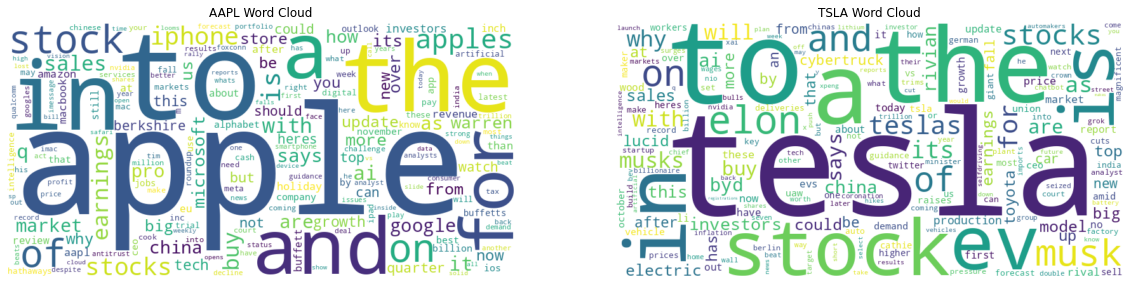

In [62]:
# Function to clean and split text into words
def clean_and_split(text):
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert text to lower case and split into words
    words = text.lower().split()
    return words

# Function to generate a word cloud from titles of a specific ticker
def generate_wordcloud_for_ticker(dataframe, ticker):
    # Filter the dataframe for the given ticker
    ticker_titles = dataframe[dataframe['ticker'] == ticker]['title'].dropna().str.cat(sep=' ')
    # Clean and split the text into words
    ticker_words = clean_and_split(ticker_titles)
    # Count the frequency of each word
    ticker_word_counts = Counter(ticker_words)
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ticker_word_counts)
    return wordcloud


# Generate word clouds for both AAPL and TSLA
wordcloud_aapl = generate_wordcloud_for_ticker(df, 'AAPL')
wordcloud_tsla = generate_wordcloud_for_ticker(df, 'TSLA')

# Display the word clouds using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# AAPL word cloud
axs[0].imshow(wordcloud_aapl, interpolation='bilinear')
axs[0].set_title('AAPL Word Cloud')
axs[0].axis('off')

# TSLA word cloud
axs[1].imshow(wordcloud_tsla, interpolation='bilinear')
axs[1].set_title('TSLA Word Cloud')
axs[1].axis('off')

plt.show()

## Sentiment Analysis

We are using lambda function with the VADER sentiment analysis tool from the nltk library to calculate the compound sentiment score for each title in a dataframe.
- A positive score indicates a positive sentiment.
- A negative score indicates a negative sentiment.
- A score around 0 indicates a neutral sentiment.

In [63]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
vader = SentimentIntensityAnalyzer()

In [70]:
f = lambda title: vader.polarity_scores(title)['compound']
df = df.copy()
df['compound'] = df['title'].apply(f)
df.loc[:, 'compound'] = df['title'].apply(f)

In [71]:
df

,ticker,date,time,title,datetime,compound
0,AAPL,2023-11-03,01:04 AM,The Apple Inc (AAPL) Company: A Short SWOT Ana...,2023-11-03 01:04:00,0.0000
1,AAPL,2023-11-03,08:32 PM,Jim Cramer gets to the core of Apple after ear...,2023-11-03 20:32:00,0.0000
2,AAPL,2023-11-03,08:32 PM,"I wanna own Apple, not trade it, says Jim Cramer",2023-11-03 20:32:00,0.0000
3,AAPL,2023-11-03,06:29 PM,Weekly Roundup,2023-11-03 18:29:00,0.0000
4,AAPL,2023-11-03,06:17 PM,"The Score: Six Flags, Apple, WeWork and More S...",2023-11-03 18:17:00,0.0000
...,...,...,...,...,...,...
201,TSLA,2023-11-13,04:43 PM,Tesla Vs. BYD 2023: BYD Has Seized The BEV Cro...,2023-11-13 16:43:00,0.0000
202,TSLA,2023-11-13,04:27 PM,Tesla Strikes Deal To Sell Chargers to British...,2023-11-13 16:27:00,-0.3612
203,TSLA,2023-11-13,04:13 PM,The Magnificent Seven Are Looking Magnificent ...,2023-11-13 16:13:00,0.8316
204,TSLA,2023-11-13,03:44 PM,Firefighters vs. EVs: Why EV Fires Are Harder ...,2023-11-13 15:44:00,0.0000


Calculate the mean compound score for each day:

In [72]:
mean_df = df.groupby(['ticker', 'date'])['compound'].mean().reset_index()

In [73]:
mean_df

,ticker,date,compound
0,AAPL,2023-11-02,-0.002984
1,AAPL,2023-11-03,0.032967
2,AAPL,2023-11-04,0.041313
3,AAPL,2023-11-05,0.050238
4,AAPL,2023-11-06,0.034654
5,AAPL,2023-11-07,0.109100
6,AAPL,2023-11-08,0.114797
7,AAPL,2023-11-09,0.086483
8,AAPL,2023-11-10,0.212727
9,AAPL,2023-11-11,0.101860


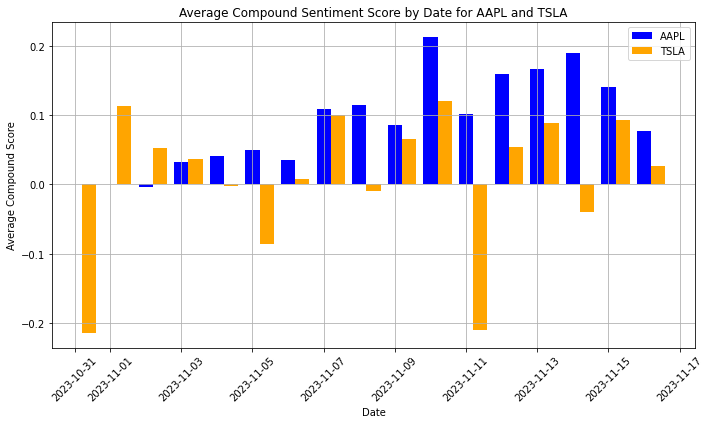

In [77]:
# Convert the 'date' column to datetime type
mean_df['date'] = pd.to_datetime(mean_df['date'])

plt.figure(figsize=(10, 6))

# Create a bar plot for AAPL
plt.bar(mean_df[mean_df['ticker'] == 'AAPL']['date'],
        mean_df[mean_df['ticker'] == 'AAPL']['compound'],
        width=0.4, label='AAPL', color='blue')

# Create a bar plot for TSLA, offset by 0.4 days for clarity
plt.bar(mean_df[mean_df['ticker'] == 'TSLA']['date'] + pd.Timedelta(days=0.4),
        mean_df[mean_df['ticker'] == 'TSLA']['compound'],
        width=0.4, label='TSLA', color='orange')

# Formatting the date labels to show the year, month, and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adding the axis labels and title
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.title('Average Compound Sentiment Score by Date for AAPL and TSLA')

# Adding a grid and a legend
plt.grid(True)
plt.legend()

# Show the plot with clear date labels including the year
plt.tight_layout()
plt.show()


## Correlational Analysis

Getting the numerical values for these stocks for more analysis

In [78]:
# Define the start and end date for the historical data
start_date = '2023-01-01'
end_date = '2023-11-16'

# Download the stock price data
df_stock = yf.download(tickers, start=start_date, end=end_date)

# Display the first few rows of the data
print(df_stock.head())

[*********************100%%**********************]  2 of 2 completed
             Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-01-03  124.374802  108.099998  125.070000  108.099998  130.899994   
2023-01-04  125.657639  113.639999  126.360001  113.639999  128.660004   
2023-01-05  124.325081  110.339996  125.019997  110.339996  127.769997   
2023-01-06  128.899490  113.059998  129.619995  113.059998  130.289993   
2023-01-09  129.426559  119.769997  130.149994  119.769997  133.410004   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2023-01-03  118.800003  124.169998  104.639999  130.279999  118.470001   
2023-01-04  114.589996  125.080002  107.51

In [79]:
# Select the 'Adj Close' prices for both AAPL and TSLA
adj_close_df = df_stock['Adj Close'].reset_index()
adj_close_df.columns = ['date', 'AAPL', 'TSLA']  


In [95]:
# Merge sentiment data with adjusted close price data
merged_df = pd.merge(mean_df, adj_close_df, on='date', how='inner')

# Create a 'stock_price' column and populate it based on the 'ticker' column
merged_df['stock_price'] = np.where(merged_df['ticker'] == 'AAPL', merged_df['AAPL'], merged_df['TSLA'])

# Drop the 'AAPL' and 'TSLA' columns as they are no longer needed
merged_df = merged_df.drop(['AAPL', 'TSLA'], axis=1)


In [96]:
merged_df 

,ticker,date,compound,stock_price
0,AAPL,2023-11-02,-0.002984,177.336380
1,TSLA,2023-11-02,0.053357,218.509995
2,AAPL,2023-11-03,0.032967,176.417572
3,TSLA,2023-11-03,0.036628,219.960007
4,AAPL,2023-11-06,0.034654,178.994186
5,TSLA,2023-11-06,0.007805,219.270004
6,AAPL,2023-11-07,0.109100,181.580780
7,TSLA,2023-11-07,0.100063,222.179993
8,AAPL,2023-11-08,0.114797,182.649368
9,TSLA,2023-11-08,-0.010119,222.110001


In [97]:
#df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/merged_df.csv', index=False)

In [101]:
# Calculate correlation for AAPL
aapl_corr = merged_df[merged_df['ticker'] == 'AAPL']['compound'].corr(merged_df[merged_df['ticker'] == 'AAPL']['stock_price'])

# Calculate correlation for TSLA
tsla_corr = merged_df[merged_df['ticker'] == 'TSLA']['compound'].corr(merged_df[merged_df['ticker'] == 'TSLA']['stock_price'])

print(f"AAPL Sentiment/Price Correlation: {aapl_corr}")
print(f"TSLA Sentiment/Price Correlation: {tsla_corr}")


AAPL Sentiment/Price Correlation: 0.9162205879955198
TSLA Sentiment/Price Correlation: 0.25777835933430626


The correlation results indicate a strong positive correlation between sentiment scores and stock prices for AAPL, with a correlation coefficient of 0.9162. This suggests that the sentiment derived from news articles is closely aligned with the fluctuations in AAPL's stock prices.

In contrast, for TSLA, the correlation is positive but much weaker, at 0.2578. This indicates a modest relationship between news sentiment and TSLA's stock price movements.

These differences in correlation could be attributed to various factors such as the nature of news coverage, market sensitivity to news, or the different business sectors and strategies of these companies.

## Lagged Correlation Analysis

This analysis will help us determine if there's a time delay between changes in news sentiment and stock price movements. We'll calculate the correlation between news sentiment and stock prices for different lag times (1 or 2 days). For instance, we might find that today's news sentiment has a stronger correlation with tomorrow's stock price than with today's price.

In [103]:
# Define the lag times
lag_times = [1, 2]

# Initialize a dictionary to store correlation results
lagged_correlations = {'AAPL': {}, 'TSLA': {}}

# Calculate the correlation for each lag time and each stock
for lag in lag_times:
    # Shift the sentiment scores
    merged_df_shifted = merged_df.copy()
    merged_df_shifted['compound'] = merged_df_shifted.groupby('ticker')['compound'].shift(-lag)

    # Calculate correlation for each stock
    for ticker in ['AAPL', 'TSLA']:
        df_ticker = merged_df_shifted[merged_df_shifted['ticker'] == ticker]
        corr = df_ticker['compound'].corr(df_ticker['stock_price'])  # Use 'stock_price' instead of the ticker column
        lagged_correlations[ticker][lag] = corr
lagged_correlations

{'AAPL': {1: 0.7279674518617457, 2: 0.6978530971035691},
 'TSLA': {1: -0.6795073102049839, 2: -0.22798604709244033}}

- AAPL
    - Variable 1: Correlation coefficient is 0.728. This indicates a strong positive correlation. As the value of Variable 1 increases, AAPL stock prices tend to increase.
    - Variable 2: Correlation coefficient is 0.698. This also suggests a strong positive correlation, although slightly weaker than with Variable 1.

- TSLA
    - Variable 1: Correlation coefficient is −0.68. This indicates a strong negative correlation. As the value of Variable 1 increases, TSLA stock prices tend to decrease.
    - Variable 2: Correlation coefficient is −0.228. This shows a weak negative correlation, suggesting that as Variable 2 increases, TSLA stock prices tend to decrease slightly.

## Category-Based Sentiment Analysis

In [105]:
# Categorizing news as positive or negative
merged_df['news_category'] = np.where(merged_df['compound'] > 0, 'Positive', 'Negative')
merged_df

,ticker,date,compound,stock_price,news_category
0,AAPL,2023-11-02,-0.002984,177.336380,Negative
1,TSLA,2023-11-02,0.053357,218.509995,Positive
2,AAPL,2023-11-03,0.032967,176.417572,Positive
3,TSLA,2023-11-03,0.036628,219.960007,Positive
4,AAPL,2023-11-06,0.034654,178.994186,Positive
5,TSLA,2023-11-06,0.007805,219.270004,Positive
6,AAPL,2023-11-07,0.109100,181.580780,Positive
7,TSLA,2023-11-07,0.100063,222.179993,Positive
8,AAPL,2023-11-08,0.114797,182.649368,Positive
9,TSLA,2023-11-08,-0.010119,222.110001,Negative


In [106]:

# Calculate the average sentiment score for each news category
average_sentiment = merged_df.groupby('news_category')['compound'].mean().reset_index()

# Separate the dataset into two groups based on news category
positive_sentiment = merged_df[merged_df['news_category'] == 'Positive']
negative_sentiment = merged_df[merged_df['news_category'] == 'Negative']

# Calculate the correlation between average sentiment and stock price for AAPL
aapl_positive_corr = positive_sentiment[positive_sentiment['ticker'] == 'AAPL']['compound'].corr(positive_sentiment[positive_sentiment['ticker'] == 'AAPL']['stock_price'])
aapl_negative_corr = negative_sentiment[negative_sentiment['ticker'] == 'AAPL']['compound'].corr(negative_sentiment[negative_sentiment['ticker'] == 'AAPL']['stock_price'])

# Calculate the correlation between average sentiment and stock price for TSLA
tsla_positive_corr = positive_sentiment[positive_sentiment['ticker'] == 'TSLA']['compound'].corr(positive_sentiment[positive_sentiment['ticker'] == 'TSLA']['stock_price'])
tsla_negative_corr = negative_sentiment[negative_sentiment['ticker'] == 'TSLA']['compound'].corr(negative_sentiment[negative_sentiment['ticker'] == 'TSLA']['stock_price'])

# Display the results
print(f"AAPL Positive Sentiment/Price Correlation: {aapl_positive_corr}")
print(f"AAPL Negative Sentiment/Price Correlation: {aapl_negative_corr}")
print(f"TSLA Positive Sentiment/Price Correlation: {tsla_positive_corr}")
print(f"TSLA Negative Sentiment/Price Correlation: {tsla_negative_corr}")


AAPL Positive Sentiment/Price Correlation: 0.8968516914253252
AAPL Negative Sentiment/Price Correlation: nan
TSLA Positive Sentiment/Price Correlation: -0.033611498162967525
TSLA Negative Sentiment/Price Correlation: 0.8445743420017657


C:\Users\Mohammad\anaconda3\envs\graphviz\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Mohammad\anaconda3\envs\graphviz\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Mohammad\anaconda3\envs\graphviz\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


- AAPL:

    - Positive sentiment has a strong positive correlation (0.8969) with stock price movements.
    - Negative sentiment doesn't have a valid correlation (NaN) with stock price movements.

- TSLA:

    - Positive sentiment has a weak negative correlation (-0.0336) with stock price movements.
    - Negative sentiment has a strong positive correlation (0.8446) with stock price movements.

These results suggest that for AAPL, positive sentiment is strongly correlated with stock price movements, while negative sentiment doesn't show a valid correlation. For TSLA, positive sentiment has a weak negative correlation, and negative sentiment is strongly positively correlated with stock price movements.